In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read your csv file into a pandas dataframe
df = pd.read_csv('data/dataELO.csv')
df = df.dropna()
df['Temp'] = df['Temp'].astype(str)
df.dtypes

Comp              object
Temp              object
Data              object
Casa              object
GC               float64
GF               float64
Fora              object
Res               object
PC                 int64
PF                 int64
J                float64
Elo Casa         float64
Elo Fora         float64
Novo Elo Casa    float64
Novo Elo Fora    float64
dtype: object

In [13]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J,Elo Casa,Elo Fora,Novo Elo Casa,Novo Elo Fora
0,CBR,2003.0,2003-02-05,Atlético Cajazeirense,1.0,1.0,Bahia,E,1,1,4.0,1500.00,1500.00,1496.50,1503.50
1,CBR,2003.0,2003-02-05,Botafogo-PB,1.0,4.0,Flamengo,VV,0,3,7.0,1500.00,1500.00,1483.52,1516.48
2,CBR,2003.0,2003-02-05,Sampaio Corrêa,1.0,4.0,São Caetano,VV,0,3,5.0,1500.00,1500.00,1483.52,1516.48
3,CBR,2003.0,2003-02-05,Operário-MT,0.0,1.0,Palmeiras,VV,0,3,6.0,1500.00,1500.00,1484.00,1516.00
4,CBR,2003.0,2003-02-05,CRB,0.0,1.0,Atlético-MG,VV,0,3,3.0,1500.00,1500.00,1484.00,1516.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22587,Série A,2023.0,2023-08-14,Palmeiras,1.0,0.0,Cruzeiro,VC,3,0,187.0,1866.57,1701.05,1874.13,1693.49
22588,Série A,2023.0,2023-08-14,Red Bull Bragantino,1.0,1.0,Vasco,E,1,1,186.0,1807.15,1600.24,1791.03,1616.36
22589,Série C,2023.0,2023-08-14,Floresta,2.0,0.0,Ypiranga-RS,VC,3,0,170.0,1488.76,1535.65,1493.74,1530.67
22590,Série B,2023.0,2023-08-14,ABC,1.0,1.0,Ituano,E,1,1,228.0,1486.71,1574.00,1486.26,1574.45


In [14]:
def determine_and_add_outcome(df):
    def determine_outcome(higher_elo, lower_elo, result):
        elo_diff = higher_elo - lower_elo

        if result == 'VC':
            if elo_diff > 0:
                return 'Vitória melhor Elo'
            elif elo_diff < 0:
                return 'Vitória pior Elo'
            else:
                return 'Elo igual'
        elif result == 'VV':
            if elo_diff > 0:
                return 'Vitória pior Elo'
            elif elo_diff < 0:
                return 'Vitória melhor Elo'
            else:
                return 'Elo igual'
        else:
            return 'Empate'

    # Apply the determine_outcome function to each row in the DataFrame
    df['Resultado'] = df.apply(lambda row: determine_outcome(row['Elo Casa'], row['Elo Fora'], row['Res']), axis=1)

    return df

# Call the function to add the 'Outcome' column to your DataFrame
df_with_outcomes = determine_and_add_outcome(df)

# Save the updated DataFrame to a CSV file
df_with_outcomes.to_csv('data/dataELOranking_with_outcomes.csv', index=False)


In [25]:
import pandas as pd

def calculate_win_probabilities(df):
    elo_diff_probs = {}

    for index, row in df.iterrows():
        elo_diff = abs(row['Elo Casa'] - row['Elo Fora'])
        outcome = row['Resultado']

        if elo_diff not in elo_diff_probs:
            elo_diff_probs[elo_diff] = {'Vitória melhor Elo': 0, 
                                        'Vitória pior Elo': 0,  
                                        'Empate': 0,
                                        'Elo igual': 0,
                                        'Total de jogos': 0}

        elo_diff_probs[elo_diff][outcome] += 1
        elo_diff_probs[elo_diff]['Total de jogos'] += 1

    for elo_diff, probs in elo_diff_probs.items():
        total_matches = probs['Total de jogos']
        for outcome in ['Vitória melhor Elo', 'Vitória pior Elo', 'Elo igual', 'Empate']:
            probs[outcome + ' (%)'] = probs[outcome] / total_matches * 100

    return elo_diff_probs

# Call the function to add the 'Outcome' column to your DataFrame
df_with_outcomes = determine_and_add_outcome(df)

# Calculate win probabilities based on Elo differences
elo_diff_probs = calculate_win_probabilities(df_with_outcomes)

# Create a DataFrame for visualization
prob_df = pd.DataFrame(elo_diff_probs).T
prob_df.index.name = 'Diferença'
prob_df.reset_index(inplace=True)

# Save the DataFrame to a CSV file
prob_df.to_csv('data/win_probabilities.csv', index=False)



In [16]:
prob_df = prob_df.sort_values(by='Diferença')
prob_df

,Diferença,Vitória melhor Elo,Vitória pior Elo,Empate,Elo igual,Total de jogos,Vitória melhor Elo (%),Vitória pior Elo (%),Elo igual (%),Empate (%)
0,0.00,0.0,0.0,17.0,59.0,76.0,0.000000,0.000000,77.631579,22.368421
851,0.01,3.0,1.0,1.0,0.0,5.0,60.000000,20.000000,0.000000,20.000000
5306,0.01,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000
1152,0.02,0.0,1.0,1.0,0.0,2.0,0.000000,50.000000,0.000000,50.000000
80,0.03,1.0,2.0,0.0,0.0,3.0,33.333333,66.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
14121,430.76,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000
12071,438.70,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000
12087,461.68,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000
13652,477.81,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000


In [18]:
import numpy as np

# Define the interval size for grouping Elo differences
interval_size = 5

# Calculate the grouped interval for each Elo difference
prob_df['Tamanho da diferença'] = np.floor_divide(prob_df['Diferença'], interval_size) * interval_size

# Group the data by the grouped interval and calculate statistics within each group
grouped_df = prob_df.groupby('Tamanho da diferença').agg({
    'Vitória melhor Elo (%)': 'mean',
    'Vitória pior Elo (%)': 'mean',
    'Elo igual (%)': 'mean',
    'Empate (%)': 'mean',
    'Total de jogos': 'sum',
})

# Reset the index of the grouped DataFrame for better visualization
grouped_df.reset_index(inplace=True)

# Print the grouped DataFrame
grouped_df


,Tamanho da diferença,Vitória melhor Elo (%),Vitória pior Elo (%),Elo igual (%),Empate (%),Total de jogos
0,0.0,35.380605,36.832100,0.117091,27.670203,1501.0
1,5.0,37.698047,37.008631,0.000000,25.293322,1347.0
2,10.0,35.815476,36.984747,0.000000,27.199777,1293.0
3,15.0,39.448888,34.705004,0.000000,25.846108,1257.0
4,20.0,37.433333,34.263889,0.000000,28.302778,1182.0
...,...,...,...,...,...,...
82,430.0,100.000000,0.000000,0.000000,0.000000,1.0
83,435.0,100.000000,0.000000,0.000000,0.000000,1.0
84,460.0,100.000000,0.000000,0.000000,0.000000,1.0
85,475.0,100.000000,0.000000,0.000000,0.000000,1.0


In [19]:
filt = (grouped_df["Total de jogos"] > 10)
data = grouped_df[filt]
data

,Tamanho da diferença,Vitória melhor Elo (%),Vitória pior Elo (%),Elo igual (%),Empate (%),Total de jogos
0,0.0,35.380605,36.832100,0.117091,27.670203,1501.0
1,5.0,37.698047,37.008631,0.000000,25.293322,1347.0
2,10.0,35.815476,36.984747,0.000000,27.199777,1293.0
3,15.0,39.448888,34.705004,0.000000,25.846108,1257.0
4,20.0,37.433333,34.263889,0.000000,28.302778,1182.0
5,25.0,38.681135,34.927657,0.000000,26.391208,1118.0
6,30.0,37.437700,30.927325,0.000000,31.634975,1079.0
7,35.0,38.146811,30.755114,0.000000,31.098075,974.0
8,40.0,39.527458,34.310345,0.000000,26.162197,934.0
9,45.0,42.398536,32.198935,0.000000,25.402528,824.0


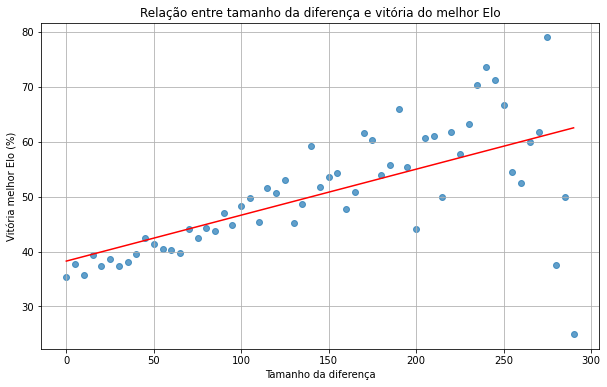

In [24]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(data['Tamanho da diferença'], data['Vitória melhor Elo (%)'], alpha=0.7)
plt.title('Relação entre tamanho da diferença e vitória do melhor Elo')
plt.xlabel('Tamanho da diferença')
plt.ylabel('Vitória melhor Elo (%)')
# Fit a linear regression line
coefficients = np.polyfit(data['Tamanho da diferença'], data['Vitória melhor Elo (%)'], 1)
p = np.poly1d(coefficients)
x_range = np.linspace(data['Tamanho da diferença'].min(), data['Tamanho da diferença'].max(), 100)
plt.plot(x_range, p(x_range), color='red')



plt.grid(True)
plt.show()


In [ ]:
prob_df

In [ ]:
prob_df['Elo Difference Rank'] = prob_df['Elo Difference'].rank(ascending=False, method='dense')
prob_df



In [ ]:
def update_df(df):
    # create dictionary to hold goal and point data for each team
    teams = {}
    
     # filter dataframe to only include rows for the specified season

    
    
    # loop through each row in the dataframe
    for i, row in df.iterrows():
        # get home and away team names
        home_team = row['Casa']
        away_team = row['Fora']
        
        # check if home team is in dictionary, if not add it
        if home_team not in teams:
            teams[home_team] = {'goals': 0, 'points': 0}
        
        # check if away team is in dictionary, if not add it
        if away_team not in teams:
            teams[away_team] = {'goals': 0, 'points': 0}
        
        # update goal and point data for home and away teams
        teams[home_team]['goals'] += row['GC']
        teams[away_team]['goals'] += row['GF']
        teams[home_team]['points'] += row['PC']
        teams[away_team]['points'] += row['PF']
        
        # update dataframe with home and away goal and point data
        df.at[i, 'home_goals'] = teams[home_team]['goals']
        df.at[i, 'away_goals'] = teams[away_team]['goals']
        df.at[i, 'home_points'] = teams[home_team]['points']
        df.at[i, 'away_points'] = teams[away_team]['points']
    
    return df

df = update_df(df)
df


In [4]:
filt = (df['Casa'] == 'Corinthians') | (df['Fora'] == 'Corinthians')
df.loc[filt].tail(6)

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J,Home_Elo,Away_Elo,Home_New_Elo,Away_New_Elo,home_goals,away_goals,home_points,away_points
17527,Série A,2023,2023-06-21,Santos,0,2,Corinthians,VV,0,3,103,1719.07,1740.22,1692.99,1766.30,1242.0,1138.0,1318.0,1347.0
17543,Série A,2023,2023-06-24,Athletico-PR,1,0,Corinthians,VC,3,0,112,1750.04,1766.30,1765.93,1750.41,1131.0,1138.0,1238.0,1347.0
17574,Série A,2023,2023-07-02,Corinthians,0,1,Red Bull Bragantino,VV,0,3,128,1750.41,1757.27,1724.74,1782.94,1138.0,709.0,1347.0,748.0
17589,CBR,2023,2023-07-05,América-MG,1,0,Corinthians,VC,3,0,110,1697.79,1724.74,1710.48,1712.05,723.0,1138.0,846.0,1347.0
17597,Série A,2023,2023-07-08,Atlético-MG,0,1,Corinthians,VV,0,3,134,1799.30,1712.05,1762.95,1748.40,1328.0,1139.0,1366.0,1350.0
17616,CBR,2023,2023-07-15,Corinthians,3,2,América-MG,VC,3,0,116,1748.40,1684.62,1758.15,1674.87,1142.0,726.0,1353.0,846.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np


# Convert the 'Data' column to a numerical timestamp
df['Data'] = pd.to_datetime(df['Data']).apply(lambda x: int(round(x.timestamp())))

# Create a binary variable to represent the match result (1 if home team won, 0 otherwise)
df['Res'] = df['Res'].apply(lambda x: 1 if x == 'VC' else 0)
df = pd.get_dummies(df, columns=['Casa'])

# Select the input features and target variable
x = df[['Elo Casa', 'Elo Fora',]]
y = df['Res']



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#train
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
#test
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)







r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² da Random Forrest: {r2_rf}")
print(f"RSME da Random Forrest: {rmse_rf}")



R² da Regressão Linear: 0.035353867335012334
RSME da Regressão Linear: 0.49090367284079245
R² da Random Forrest: -0.14926751206292943
RSME da Random Forrest: 0.53582482733876


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

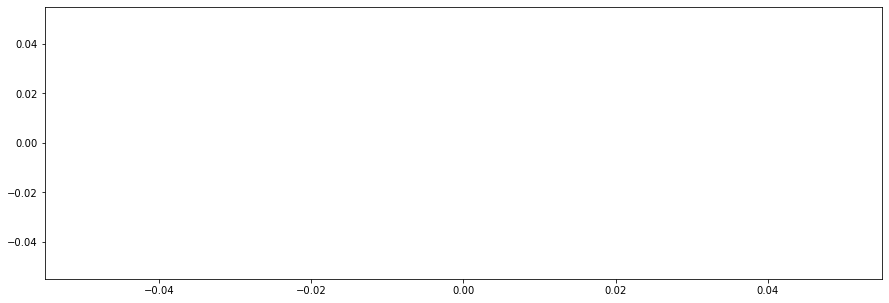

In [11]:
df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)